## Program for preparing labeled data from label box

In [1]:
# Import necessary packages
import numpy as np
import json
import sys
#download tool for http requests
#!conda install --yes --prefix {sys.prefix} requests
import requests
import imageio

### Get the data from the json file pointed to by the filepath below

In [3]:
# read the command line input for the path to the json file with labels
filepath = "data.json"

names_of_masks = ["Sky","Chewie ","Grass"] # Put the names of masks in the training data here

with open(filepath, "r") as read_file:
    data = json.load(read_file)
    # string = json.dumps(data, indent=2)
    # print(string) # for visualizing the json better
    first_loop = True
    for item in data:
        # python arrays for storing images before being put into a numpy array
        mask_img = []
        img = []
        
        #put the masks into the array in the right order!!!
        masks = item['Masks']
        num_layers = 0
        for layer in masks:
            
            url = masks[layer]
            im = imageio.imread(url)
            
            #if the layer has not been added and index number of layers is behind the expected (i.e. it needs to skip a layer to be added correctly)
            if names_of_masks.index(layer) > num_layers:
                while names_of_masks[num_layers] != layer:
                    mask_img.append(np.zeros(im[:, :, 0].shape)) #moves the index so that the layers are consistent
                    num_layers += 1
                mask_img.append(im[:, :, 0])
                num_layers += 1
            #elif the current index is the right layer
            elif names_of_masks.index(layer) == num_layers:
                mask_img.append(im[:, :, 0])
                num_layers += 1
            #else the current index is ahead of the right layer (means that somewhere this is a blank placeholder for this layer)
            else:
                mask_img[names_of_masks.index(layer)] = im[:, :, 0]
                
        #this accounts for the case that only th first or second label exist but not ones after if        
        while len(names_of_masks) > len(mask_img):
            mask_img.append(np.zeros(im[:, :, 0].shape)) #make sure that all the layers of array are filled even if not all layers contain label
            
        image_url = item['Labeled Data']
        
        # Build up large numpy array of all the images
        img = imageio.imread(image_url)
        
        #this should be removed for other data (i was being dumb and messed up a dataset entry)
        if(img.shape != (1536, 2048, 3)):
            continue
            
        print(np.array([mask_img]).shape)
            
        if first_loop:
            images = np.array([img])
            mask_images = np.array([mask_img])
        else:
            images = np.append(images, np.array([img]), axis=0)
            mask_images = np.append(mask_images, np.array([mask_img]), axis=0)
            
        print("Data added")
        
        first_loop = False
        
print("Image shape: " + str(images.shape))
print("Mask shape: " + str(mask_images.shape))

Over here
Over here
Over here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Over here
(1, 3, 1536, 2048)
Over here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Over here
Here
Over here
(1, 3, 1536, 2048)
Over here
Over here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Here
Over here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Here
Over here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Over here
Over here
Over here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Over here
Here
(1, 3, 1536, 2048)
Over here
Over here
(1, 3, 1536, 2048)
Over here
Over here
(1, 3, 1536, 2048)
Over here
(1, 3, 1536, 2048)
Over here
(1, 3, 1536, 2048)
Over here
(1,

In [ ]:
#Turn mask_images into a numpy array
# images = np.array(img)
# mask_images = np.array(mask_img)
# print(mask_images.shape)
# print(images.shape)

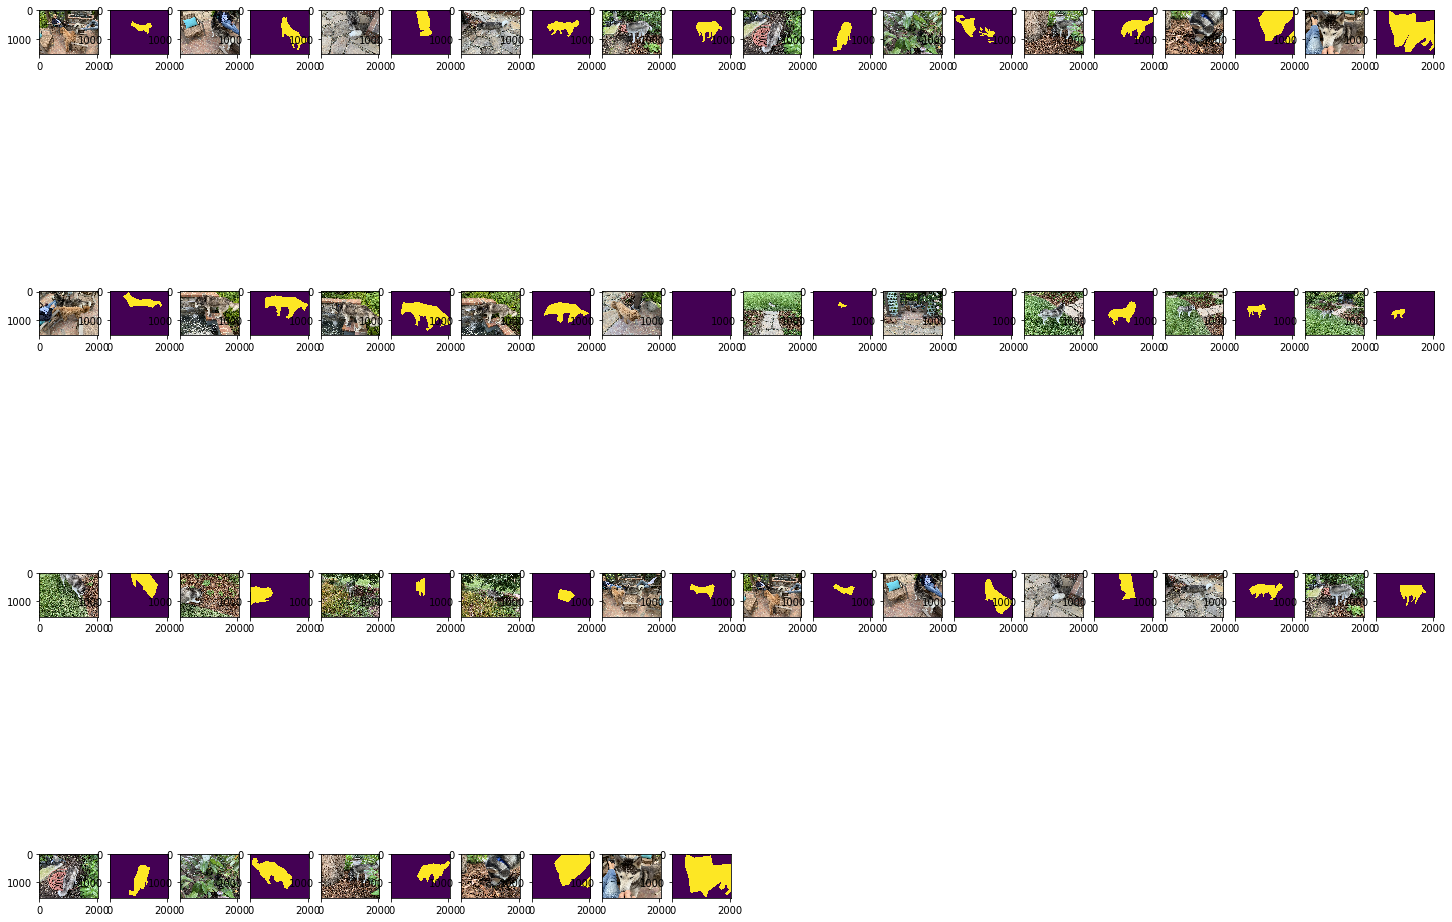

In [5]:
#Make sure that data was collected ok

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#view the results of the test
fig=plt.figure(figsize=(25, 25))
i = 1
for x in range(len(images)):
                
    fig.add_subplot(5, 20, i)
    plt.imshow(images[x])
    i+=1
    fig.add_subplot(5, 20, i) #first mask of every image
    plt.imshow(mask_images[x, 0])
    i+=1
    
plt.show()

In [6]:
#Concatenate the masks into a single high channel array and turn array values from 0-255 to 0-1
mask_images = np.moveaxis(mask_images, 1, 3)
mask_images = mask_images/255.0
print(mask_images.shape)

(35, 1536, 2048, 3)


In [7]:
#resize images
import skimage.transform as trans

target_size = (512,512)

images_resized = np.zeros((len(images),target_size[0],target_size[1],3))
mask_images_resized = np.zeros((len(images),target_size[0],target_size[1],(len(mask_images[0,0,0]))))

print(images.shape)
print(mask_images.shape)

for i in range(len(images)):
    images_resized[i] = trans.resize(images[i],target_size)
    mask_images_resized[i] = trans.resize(mask_images[i],target_size)
    
print(images_resized.shape)
print(mask_images_resized.shape)

(35, 1536, 2048, 3)
(35, 1536, 2048, 3)
(35, 512, 512, 3)
(35, 512, 512, 3)


1.0


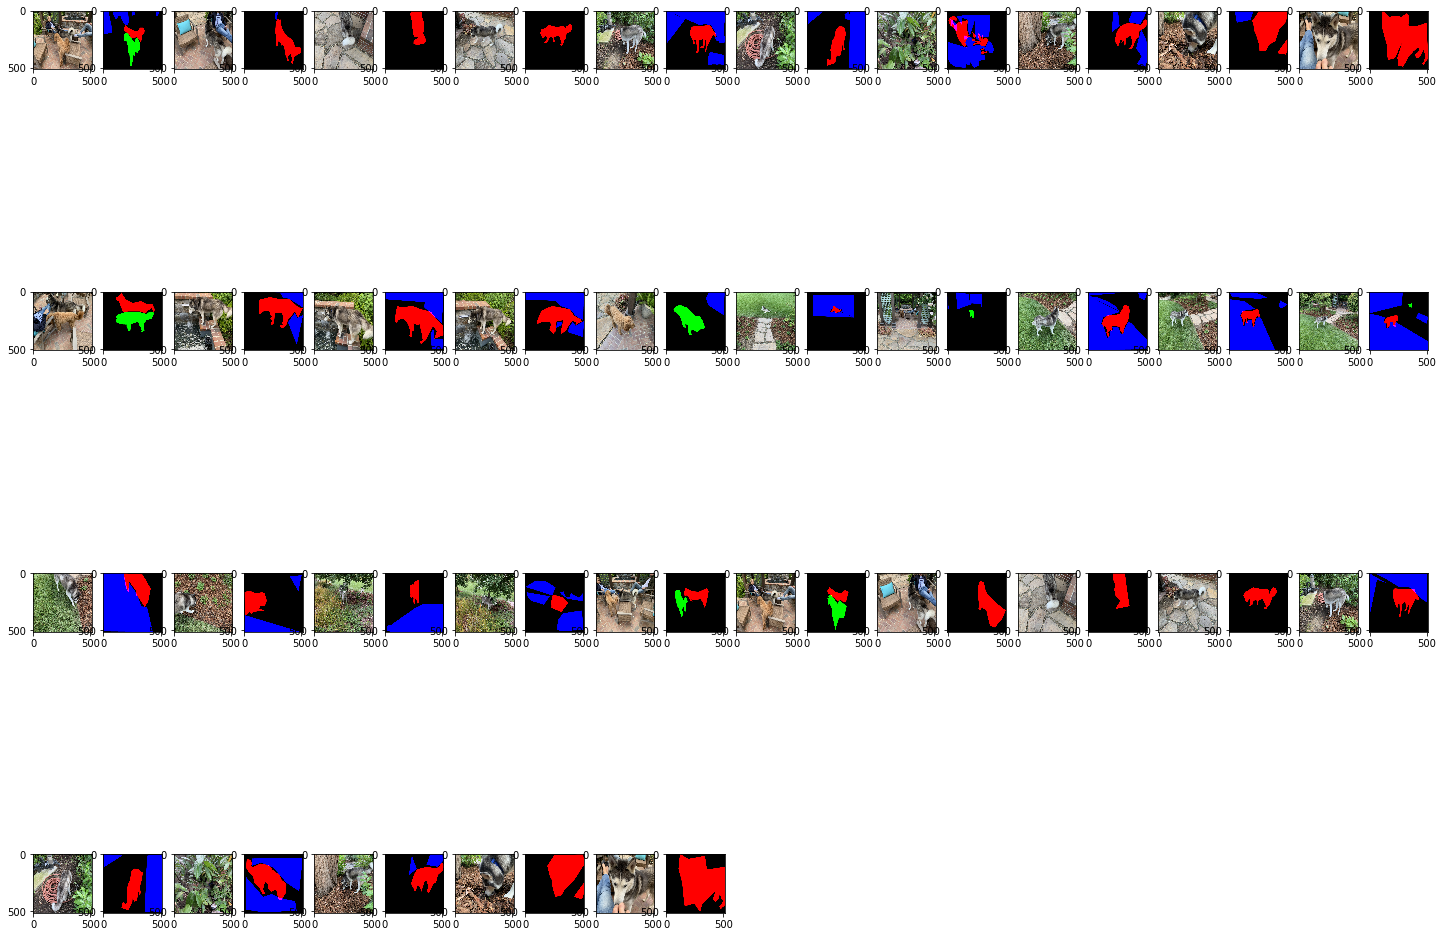

In [8]:
#Make sure that data is transformed ok

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ind = np.unravel_index(np.argmax(mask_images, axis=None), mask_images.shape)
print(mask_images[ind]) #make sure that the image has been converted to range 0.0-1.0

#view the results of the test
fig=plt.figure(figsize=(25, 25))
i = 1
for x in range(len(images_resized)):
                
    fig.add_subplot(5, 20, i)
    plt.imshow(images_resized[x])
    i+=1
    fig.add_subplot(5, 20, i) #first mask of every image
    plt.imshow(mask_images_resized[x], vmin=0, vmax=1)
    #plt.imshow(mask_images_resized[i,:,:,0], cmap='gray', vmin=0, vmax=1)
    i+=1

    
plt.show()

In [9]:
#save the images and their masks
import os
import random #generate distribution to assign 80% of images to train and 20% to test

os.makedirs("train", exist_ok=True)
os.makedirs("test", exist_ok=True)

for i in range(len(images_resized)):
    if(random.randint(1,101) < 80):
        imageio.imwrite("train/" + str(i) + '.jpg', images_resized[i])
        imageio.imwrite("train/" + str(i) + '_mask.jpg', mask_images_resized[i])
    else:
        imageio.imwrite("test/" + str(i) + '.jpg', images_resized[i])
        imageio.imwrite("test/" + str(i) + '_mask.jpg', mask_images_resized[i])

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
